<center>
    
# PROYECTO INDIVIDUAL
    


## Machine Learning Operations (MLOps)
    
</center>

## Contexto
El proyecto individual consiste en desarrollar un modelo de recomendación de películas para una startup de agregación de plataformas de streaming. El primer paso es realizar transformaciones en los datos para desanidar campos anidados, rellenar valores nulos y eliminar columnas no utilizadas. Luego, se desarrollará una API utilizando el framework FastAPI para acceder a los datos de la empresa. Se crearán 6 funciones de endpoints para consultar información histórica sobre películas estrenadas por mes y día, franquicias, películas producidas en un país y productoras. Además, se implementará un endpoint adicional para obtener recomendaciones de películas similares basadas en un título ingresado. El proyecto se desplegará utilizando servicios como Render o Railway para permitir el acceso a la API desde la web. Se realizará un análisis exploratorio de datos para investigar las relaciones entre variables y buscar patrones interesantes. Finalmente, se entrenará un modelo de machine learning para el sistema de recomendación y se mostrará su funcionamiento a través de un video de demostración. El código, el repositorio y el video serán evaluados para asegurar la calidad y el cumplimiento de los requisitos.

## 1.  Extracción de datos:
Obtener el conjunto de datos necesario para el proyecto.

In [1]:
# Librerias a utilizar en el proyecto
import pandas as pd
from unidecode import unidecode
import numpy as np
import ast
import re
import locale

In [2]:
# Carga de diccionario de datos y alineado respectivo
dic_mov = pd.read_csv("./Diccionario de Datos - Movies.csv")
dic_movies = dic_mov.style.set_properties(**{'text-align': 'left'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
dic_movies

,Característica,Descripción
0,adult,"Indica si la película tiene califiación X, exclusiva para adultos."
1,belongs_to_collection,Un diccionario que indica a que franquicia o serie de películas pertenece la película
2,budget,"El presupuesto de la película, en dólares"
3,genres,Un diccionario que indica todos los géneros asociados a la película
4,homepage,La página web oficial de la película
5,id,ID de la pelicula
6,imdb_id,IMDB ID de la pelicula
7,original_language,Idioma original en la que se grabo la pelicula
8,original_title,Titulo original de la pelicula
9,overview,Pequeño resumen de la película


In [3]:
# Carga del Datasets
df = pd.read_csv("./movies_dataset.csv", low_memory=False)

In [4]:
# Visualizacion de las caracterisitcas de los datos
# Cantidad de columnas y filas en la data y el tipo de data

print(df.shape)
print(type(df))
pd.set_option('display.max_colwidth', 25)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
df.head()

(45466, 24)
<class 'pandas.core.frame.DataFrame'>


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name':...",30000000,"[{'id': 16, 'name': '...",http://toystory.disne...,862,tt0114709,en,Toy Story,"Led by Woody, Andy's ...",21.946943,/rhIRbceoE9lR4veEXuwC...,[{'name': 'Pixar Anim...,"[{'iso_3166_1': 'US',...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', ...",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy an...,17.015539,/vzmL6fP7aPKNKPRTFnZm...,[{'name': 'TriStar Pi...,"[{'iso_3166_1': 'US',...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', ...",Released,Roll the dice and unl...,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name'...",0,"[{'id': 10749, 'name'...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reig...,11.7129,/6ksm1sjKMFLbO7UY2i6G...,[{'name': 'Warner Bro...,"[{'iso_3166_1': 'US',...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', ...",Released,Still Yelling. Still ...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': '...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreate...",3.859495,/16XOMpEaLWkrcPqSQqhT...,[{'name': 'Twentieth ...,"[{'iso_3166_1': 'US',...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', ...",Released,Friends are the peopl...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name':...",0,"[{'id': 35, 'name': '...",NaN,11862,tt0113041,en,Father of the Bride P...,Just when George Bank...,8.387519,/e64sOI48hQXyru7naBFy...,[{'name': 'Sandollar ...,"[{'iso_3166_1': 'US',...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', ...",Released,Just When His World I...,Father of the Bride P...,False,5.7,173.0


In [5]:
# Identificacion de tipos de datos y datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
# Verificar qué columnas tienen valores faltantes
df.isnull().sum(),

(adult                        0
 belongs_to_collection    40972
 budget                       0
 genres                       0
 homepage                 37684
 id                           0
 imdb_id                     17
 original_language           11
 original_title               0
 overview                   954
 popularity                   5
 poster_path                386
 production_companies         3
 production_countries         3
 release_date                87
 revenue                      6
 runtime                    263
 spoken_languages             6
 status                      87
 tagline                  25054
 title                        6
 video                        6
 vote_average                 6
 vote_count                   6
 dtype: int64,)

## 2.  Transformación de datos (ETL)
Obtener el conjunto de datos necesario para el proyecto.

In [7]:
# Desanidar los campos anidados, extrayendo los valores, clave 'name', de las columnas
# genres, production_companies, production_countries y spoken_languages

def fetch_name(obj): 
    if isinstance(obj, str) and '{' in obj:
        L=[]
        for i in ast.literal_eval(obj):
            L.append(i['name']);
        return L

In [8]:
# Extrayendo los valores de la clave 'name' de la columna belongs_to_collection

def fetch_name2(obj): 
        if isinstance(obj, str) and '{' in obj:
        # print(obj)
            dic = ast.literal_eval(obj)
            return dic['name']

In [9]:
# Aplicando las funciones a las columnas respectivas

df['genres'] = df['genres'].apply(fetch_name)
df['belongs_to_collection'] = df['belongs_to_collection'].apply(fetch_name2)
df['production_companies']  = df['production_companies'].apply(fetch_name)
df['production_countries']  = df['production_countries'].apply(fetch_name)
df['spoken_languages'] = df['spoken_languages'].apply(fetch_name)

In [10]:
df.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"[Animation, Comedy, F...",http://toystory.disne...,862,tt0114709,en,Toy Story,"Led by Woody, Andy's ...",21.946943,/rhIRbceoE9lR4veEXuwC...,[Pixar Animation Stud...,[United States of Ame...,1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0
1,False,None,65000000,"[Adventure, Fantasy, ...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy an...,17.015539,/vzmL6fP7aPKNKPRTFnZm...,"[TriStar Pictures, Te...",[United States of Ame...,1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unl...,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collec...,0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reig...,11.7129,/6ksm1sjKMFLbO7UY2i6G...,"[Warner Bros., Lancas...",[United States of Ame...,1995-12-22,0.0,101.0,[English],Released,Still Yelling. Still ...,Grumpier Old Men,False,6.5,92.0


In [12]:
# Determinando si hay nulos y vacios
df.belongs_to_collection.isnull().sum()

40975

In [13]:
# Los valores nulos de los campos revenue, budget deben ser rellenados por el número 0
df['revenue'] = df['revenue'].fillna(0)
df['budget'] = df['budget'].fillna(0)

In [14]:
# Los valores nulos del campo release date deben eliminarse.
df['release_date'].isnull().sum()

87

In [15]:
# Elimacion de los datos nulos
df.dropna(subset=['release_date'], inplace=True)
df['release_date'].isnull().sum()

0

In [16]:
# De haber fechas, deberán tener el formato AAAA-mm-dd, además deberán crear la columna release_year 
# donde extraerán el año de la fecha de estreno

# Convertir la columna release_date en formato datetime
df['release_date'] = pd.to_datetime(df["release_date"], format='%Y-%m-%d', errors = 'coerce')
df ['release_date'].dropna(inplace=True)
mascara = df[df["release_date"].isnull()]
df = df.drop(labels= mascara.index, axis=0)
# Crear las columnas separadas para año, mes y día:
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_day'] = df['release_date'].dt.day

# Establecer la configuración regional en español
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')
df["year"] = df['release_year']
df["month"] = df['release_date'].dt.strftime('%B').apply(lambda x: x.capitalize() if type(x) != float else x)
df["day"] = df['release_date'].dt.strftime('%A').apply(lambda x: x.capitalize() if type(x) != float else x)

In [17]:
df['day'].unique()

array(['Lunes', 'Viernes', 'Jueves', 'Miércoles', 'Sábado', 'Martes',
       'Domingo'], dtype=object)

In [18]:
df['month'].unique()

array(['Octubre', 'Diciembre', 'Febrero', 'Noviembre', 'Septiembre',
       'Mayo', 'Abril', 'Agosto', 'Julio', 'Junio', 'Enero', 'Marzo'],
      dtype=object)

In [19]:
df['release_year'].unique()

array([1995, 1996, 1994, 1997, 1976, 1992, 1967, 1993, 1964, 1977, 1965,
       1982, 1985, 1990, 1991, 1989, 1937, 1940, 1969, 1981, 1974, 1970,
       1960, 1955, 1959, 1968, 1980, 1988, 1975, 2002, 1948, 1943, 1950,
       1987, 1973, 1956, 1958, 1949, 1972, 1953, 1998, 1933, 2010, 1952,
       1951, 1957, 1961, 1954, 1934, 1944, 1963, 1942, 1941, 1939, 1947,
       1946, 1945, 1938, 1935, 1936, 1926, 1932, 1979, 1971, 1986, 2013,
       1978, 1966, 1962, 1983, 1984, 1931, 1922, 1999, 1927, 1929, 1930,
       1928, 2012, 1925, 2000, 1919, 1923, 1920, 1918, 1921, 2001, 2011,
       1924, 2003, 2004, 1915, 1916, 1917, 2005, 2006, 1902, 1903, 2007,
       2008, 2009, 1914, 1912, 1913, 1898, 1899, 1894, 1909, 1910, 1901,
       1893, 1896, 2014, 2016, 2015, 1895, 1911, 1900, 2020, 2017, 1905,
       1904, 1891, 2018, 1892, 1908, 1897, 1887, 1888, 1890, 1878, 1874,
       1906, 1883, 1907])

In [20]:
# Verificacion de datos nulos
print(df['day'].isnull().sum())
print(df['month'].isnull().sum())
print(df['release_year'].isnull().sum())

0
0
0


In [21]:
# Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget,
# dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo,
# deberá tomar el valor 0

# Verificacion de datos nulos y vacios
print(df['revenue'].isnull().sum())
print(df['budget'].isnull().sum())

0
0


In [22]:
# Limpiar y convertir a numérico las columnas revenue y budget

df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce').fillna(0)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0)

# Calcular el return

df['return'] = np.where(df['budget'] > 0, df['revenue'] / df['budget'], 0)
df['return'] = df['return'].apply(lambda x: round(x, 2))

In [23]:
# Eliminar las columnas que no serán utilizadas, video,imdb_id,adult,original_title,vote_count,
# poster_path, homepage, release_year, release_month, release_day

# Seleccion de columnas a eliminar
column_names_list = list(df.columns)
column_names_list

['adult',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count',
 'release_year',
 'release_month',
 'release_day',
 'year',
 'month',
 'day',
 'return']

In [24]:
# Eliminacion de columnas
df = df.drop(['video', 'imdb_id', 'adult', 'original_title', 'vote_count', 'poster_path', 'homepage', 'release_year',
 'release_month', 'release_day',], axis=1)

In [25]:
df.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,year,month,day,return
0,Toy Story Collection,30000000,"[Animation, Comedy, F...",862,en,"Led by Woody, Andy's ...",21.946943,[Pixar Animation Stud...,[United States of Ame...,1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,7.7,1995,Octubre,Lunes,12.45
1,None,65000000,"[Adventure, Fantasy, ...",8844,en,When siblings Judy an...,17.015539,"[TriStar Pictures, Te...",[United States of Ame...,1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unl...,Jumanji,6.9,1995,Diciembre,Viernes,4.04
2,Grumpy Old Men Collec...,0,"[Romance, Comedy]",15602,en,A family wedding reig...,11.7129,"[Warner Bros., Lancas...",[United States of Ame...,1995-12-22,0.0,101.0,[English],Released,Still Yelling. Still ...,Grumpier Old Men,6.5,1995,Diciembre,Viernes,0.00
3,None,16000000,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreate...",3.859495,[Twentieth Century Fo...,[United States of Ame...,1995-12-22,81452156.0,127.0,[English],Released,Friends are the peopl...,Waiting to Exhale,6.1,1995,Diciembre,Viernes,5.09
4,Father of the Bride C...,0,[Comedy],11862,en,Just when George Bank...,8.387519,[Sandollar Production...,[United States of Ame...,1995-02-10,76578911.0,106.0,[English],Released,Just When His World I...,Father of the Bride P...,5.7,1995,Febrero,Viernes,0.00


### Guardar 
El conjunto de datos transformado en un formato adecuado para su posterior análisis.

In [26]:
df.to_csv('movies_clean.csv', index=False, encoding='utf-8')

## 3. Análisis exploratorio de datos (EDA)

In [38]:
# Librerias a utilizar en el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Carga del Datasets
df1 = pd.read_csv("./movies_clean 1.csv", low_memory=False)

In [76]:
# Verificación de los primeros registros
df1.head(20)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,year,month,day,return
0,Toy Story Collection,30000000,"['Animation', 'Comedy...",862,en,"Led by Woody, Andy's ...",21.946943,['Pixar Animation Stu...,['United States of Am...,1995-10-30,373554033.0,81.0,['English'],Released,NaN,Toy Story,7.7,1995,Octubre,Lunes,12.45
1,NaN,65000000,"['Adventure', 'Fantas...",8844,en,When siblings Judy an...,17.015539,"['TriStar Pictures', ...",['United States of Am...,1995-12-15,262797249.0,104.0,"['English', 'Français']",Released,Roll the dice and unl...,Jumanji,6.9,1995,Diciembre,Viernes,4.04
2,Grumpy Old Men Collec...,0,"['Romance', 'Comedy']",15602,en,A family wedding reig...,11.712900,"['Warner Bros.', 'Lan...",['United States of Am...,1995-12-22,0.0,101.0,['English'],Released,Still Yelling. Still ...,Grumpier Old Men,6.5,1995,Diciembre,Viernes,0.00
3,NaN,16000000,"['Comedy', 'Drama', '...",31357,en,"Cheated on, mistreate...",3.859495,['Twentieth Century F...,['United States of Am...,1995-12-22,81452156.0,127.0,['English'],Released,Friends are the peopl...,Waiting to Exhale,6.1,1995,Diciembre,Viernes,5.09
4,Father of the Bride C...,0,['Comedy'],11862,en,Just when George Bank...,8.387519,['Sandollar Productio...,['United States of Am...,1995-02-10,76578911.0,106.0,['English'],Released,Just When His World I...,Father of the Bride P...,5.7,1995,Febrero,Viernes,0.00
5,NaN,60000000,"['Action', 'Crime', '...",949,en,Obsessive master thie...,17.924927,['Regency Enterprises...,['United States of Am...,1995-12-15,187436818.0,170.0,"['English', 'Español']",Released,A Los Angeles Crime Saga,Heat,7.7,1995,Diciembre,Viernes,3.12
6,NaN,58000000,"['Comedy', 'Romance']",11860,en,An ugly duckling havi...,6.677277,['Paramount Pictures'...,"['Germany', 'United S...",1995-12-15,0.0,127.0,"['Français', 'English']",Released,You are cordially inv...,Sabrina,6.2,1995,Diciembre,Viernes,0.00
7,NaN,0,"['Action', 'Adventure...",45325,en,A mischievous young b...,2.561161,['Walt Disney Pictures'],['United States of Am...,1995-12-22,0.0,97.0,"['English', 'Deutsch']",Released,The Original Bad Boys.,Tom and Huck,5.4,1995,Diciembre,Viernes,0.00
8,NaN,35000000,"['Action', 'Adventure...",9091,en,International action ...,5.231580,['Universal Pictures'...,['United States of Am...,1995-12-22,64350171.0,106.0,['English'],Released,Terror goes into over...,Sudden Death,5.5,1995,Diciembre,Viernes,1.84
9,James Bond Collection,58000000,"['Adventure', 'Action...",710,en,James Bond must unmas...,14.686036,"['United Artists', 'E...","['United Kingdom', 'U...",1995-11-16,352194034.0,130.0,"['English', 'Pусский'...",Released,No limits. No fears. ...,GoldenEye,6.6,1995,Noviembre,Jueves,6.07


In [34]:
# Mostrar los últimos registros del DataFrame
df1.tail(5)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,year,month,day,return
45371,NaN,0,"['Drama', 'Action', '...",30840,en,Yet another version o...,5.683753,['Westdeutscher Rundf...,"['Canada', 'Germany',...",1991-05-13,0.0,104.0,['English'],Released,NaN,Robin Hood,5.7,1991,Mayo,Lunes,0.0
45372,NaN,0,['Drama'],111109,tl,An artist struggles t...,0.178241,['Sine Olivia'],['Philippines'],2011-11-17,0.0,360.0,[''],Released,NaN,Century of Birthing,9.0,2011,Noviembre,Jueves,0.0
45373,NaN,0,"['Action', 'Drama', '...",67758,en,When one of her hits ...,0.903007,['American World Pict...,['United States of Am...,2003-08-01,0.0,90.0,['English'],Released,A deadly game of wits.,Betrayal,3.8,2003,Agosto,Viernes,0.0
45374,NaN,0,NaN,227506,en,In a small town live ...,0.003503,['Yermoliev'],['Russia'],1917-10-21,0.0,87.0,NaN,Released,NaN,Satan Triumphant,0.0,1917,Octubre,Domingo,0.0
45375,NaN,0,NaN,461257,en,50 years after decrim...,0.163015,NaN,['United Kingdom'],2017-06-09,0.0,75.0,['English'],Released,NaN,Queerama,0.0,2017,Junio,Viernes,0.0


In [37]:
# Obtener una muestra aleatoria de la dataregistros del DataFrame
df1.sample(5)  # Obtener una muestra de 10 registros


,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,year,month,day,return
32810,NaN,0,"['Comedy', 'Foreign']",71118,es,You can feel lonely i...,0.053278,NaN,['Argentina'],2000-09-07,0.0,100.0,['Español'],Released,NaN,Felicidades,5.0,2000,Septiembre,Jueves,0.0
42436,NaN,0,['Documentary'],174371,en,Journey to the edge o...,0.528214,NaN,NaN,2013-04-18,0.0,83.0,['English'],Released,"In Brooklyn, every da...",Flex Is Kings,6.3,2013,Abril,Jueves,0.0
29339,NaN,0,"['Drama', 'Action']",95493,en,Restored to former gl...,0.213539,['Phoenician Entertai...,NaN,2000-06-20,0.0,95.0,['English'],Released,"2,500 passengers, 1 s...",Final Voyage,3.5,2000,Junio,Martes,0.0
30477,NaN,0,"['Drama', 'Comedy']",320430,en,Peter Hammer moves to...,0.124922,NaN,NaN,2015-01-07,0.0,85.0,['English'],Released,NaN,Senior Project,0.0,2015,Enero,Miércoles,0.0
38853,NaN,0,['Documentary'],109581,en,Kate and Will Spicer'...,0.869956,['Spicer and Moore'],['United States of Am...,2015-09-25,0.0,74.0,['English'],Released,NaN,Mission to Lars,6.4,2015,Septiembre,Viernes,0.0


Visualizar para resumir los datos.

In [39]:
df1.describe()

,budget,id,popularity,revenue,runtime,vote_average,year,return
count,4.537600e+04,45376.000000,45376.000000,4.537600e+04,45130.000000,45376.000000,45376.000000,4.537600e+04
mean,4.232604e+06,108027.103094,2.926458,1.123010e+07,94.181675,5.624070,1991.881193,6.600428e+02
std,1.743986e+07,112168.377996,6.009672,6.438996e+07,38.341059,1.915423,24.055360,7.469329e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26385.750000,0.388840,0.000000e+00,85.000000,5.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59857.500000,1.130454,0.000000e+00,95.000000,6.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156533.500000,3.691695,0.000000e+00,107.000000,6.800000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,2020.000000,1.239638e+07


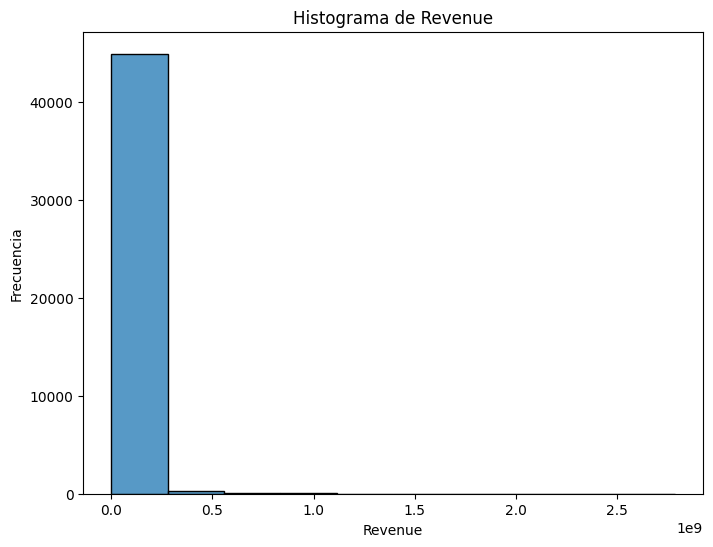

In [40]:
# Histograma de una variable
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='revenue', bins=10)
plt.title('Histograma de Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frecuencia')
plt.show()

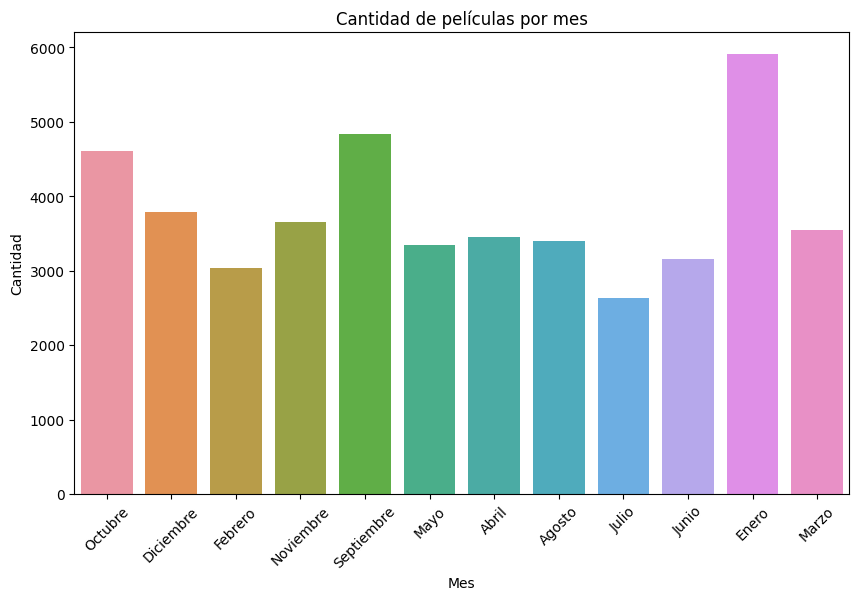

In [42]:
# Gráfico de barras de una variable categórica
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='month')
plt.title('Cantidad de películas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

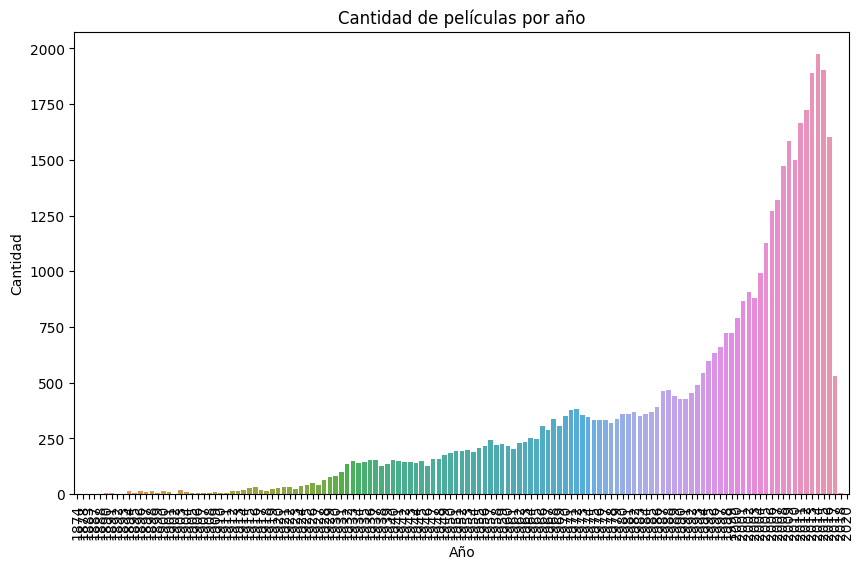

In [47]:
# Gráfico de barras de una variable categórica año
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='year')
plt.title('Cantidad de películas por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

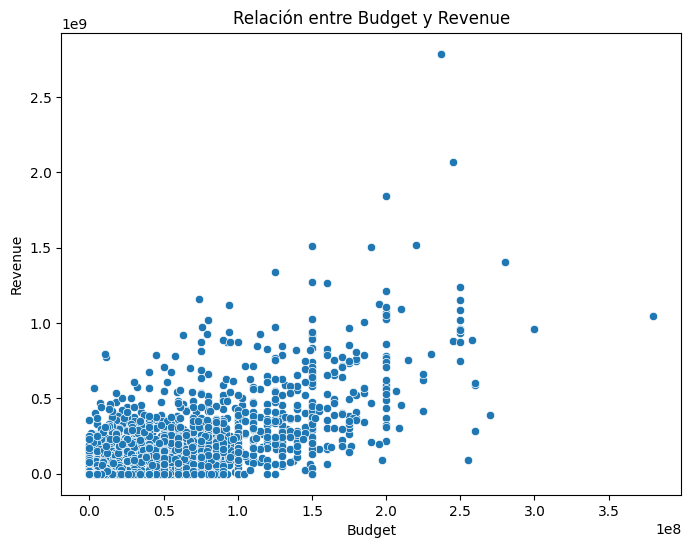

In [43]:
# Gráfico de dispersión entre dos variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='budget', y='revenue')
plt.title('Relación entre Budget y Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

/tmp/ipykernel_68751/3658804061.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


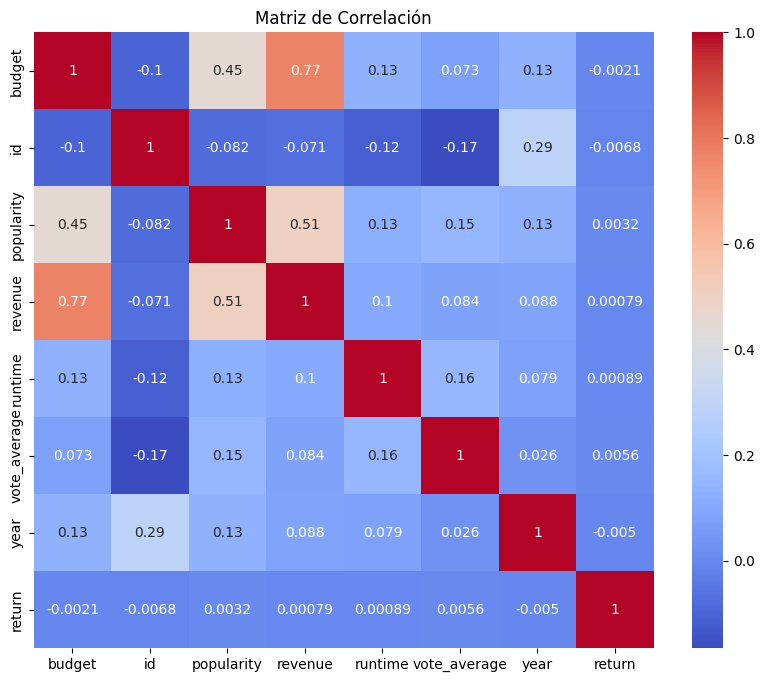

In [44]:
# Matriz de correlación
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Identificar outliers, anomalías u otros problemas en los datos que requieran atención

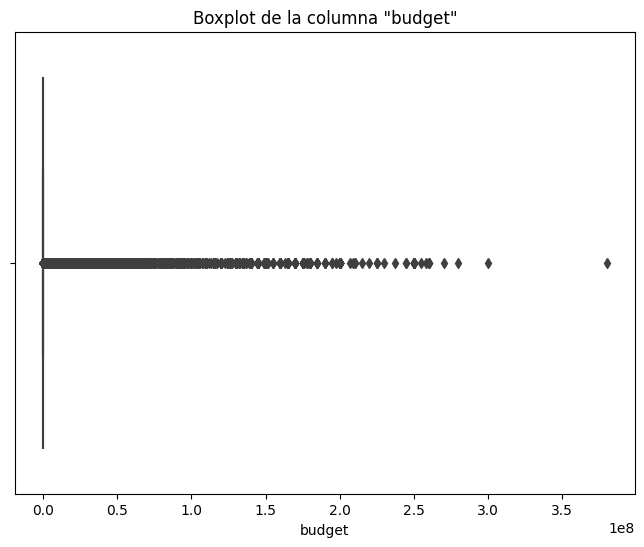

In [48]:
# Boxplot para la columna 'budget'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1['budget'])
plt.xlabel('budget')
plt.title('Boxplot de la columna "budget"')
plt.show()

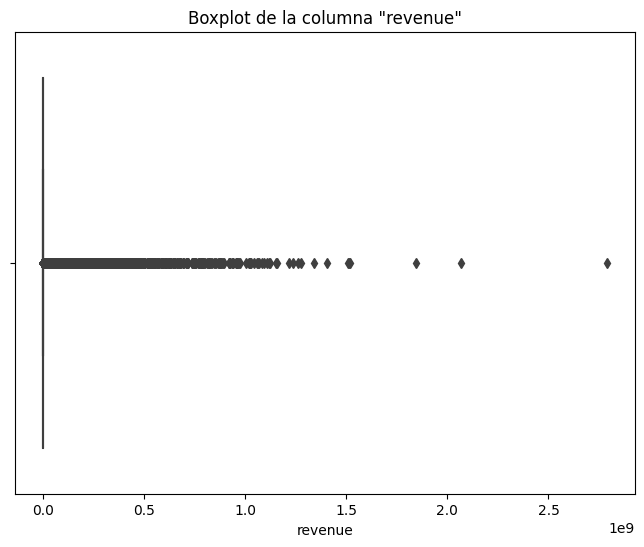

In [49]:
# Boxplot para la columna 'revenue'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1['revenue'])
plt.xlabel('revenue')
plt.title('Boxplot de la columna "revenue"')
plt.show()

In [55]:
# Cálculo del rango intercuartil (IQR) para la columna 'budget'
Q1_budget = np.percentile(df1['budget'], 25)
Q3_budget = np.percentile(df1['budget'], 75)
IQR_budget = Q3_budget - Q1_budget

# Límites para identificar outliers en la columna 'budget'
lower_bound_budget = Q1_budget - 1.5 * IQR_budget
upper_bound_budget = Q3_budget + 1.5 * IQR_budget

# Identificación de outliers en la columna 'budget'
outliers_budget = df1[(df1['budget'] < lower_bound_budget) | (df1['budget'] > upper_bound_budget)]

# Cálculo del rango intercuartil (IQR) para la columna 'revenue'
Q1_revenue = np.percentile(df1['revenue'], 25)
Q3_revenue = np.percentile(df1['revenue'], 75)
IQR_revenue = Q3_revenue - Q1_revenue

# Límites para identificar outliers en la columna 'revenue'
lower_bound_revenue = Q1_revenue - 1.5 * IQR_revenue
upper_bound_revenue = Q3_revenue + 1.5 * IQR_revenue

# Identificación de outliers en la columna 'revenue'
outliers_revenue = df1[(df1['revenue'] < lower_bound_revenue) | (df1['revenue'] > upper_bound_revenue)]

In [59]:
# Cálculo de la cantidad de valores faltantes por columna
missing_values = df1.isnull().sum()
missing_values

belongs_to_collection    40888
budget                       0
genres                    2384
id                           0
original_language           11
overview                   941
popularity                   0
production_companies     11796
production_countries      6211
release_date                 0
revenue                      0
runtime                    246
spoken_languages          3768
status                      80
tagline                  24978
title                        0
vote_average                 0
year                         0
month                        0
day                          0
return                       0
dtype: int64

In [61]:
# Porcentaje de valores faltantes por columna
missing_percent = (missing_values / len(df1)) * 100
missing_percent

belongs_to_collection    90.109309
budget                    0.000000
genres                    5.253879
id                        0.000000
original_language         0.024242
overview                  2.073783
popularity                0.000000
production_companies     25.996121
production_countries     13.687853
release_date              0.000000
revenue                   0.000000
runtime                   0.542137
spoken_languages          8.303949
status                    0.176305
tagline                  55.046721
title                     0.000000
vote_average              0.000000
year                      0.000000
month                     0.000000
day                       0.000000
return                    0.000000
dtype: float64

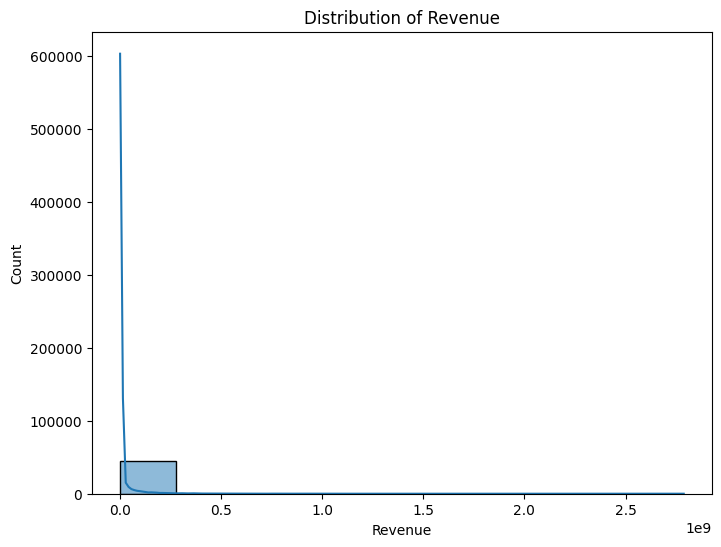

In [62]:
# Histograma de la variable 'revenue'
plt.figure(figsize=(8, 6))
sns.histplot(df1['revenue'], bins=10, kde=True)
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Distribution of Revenue')
plt.show()

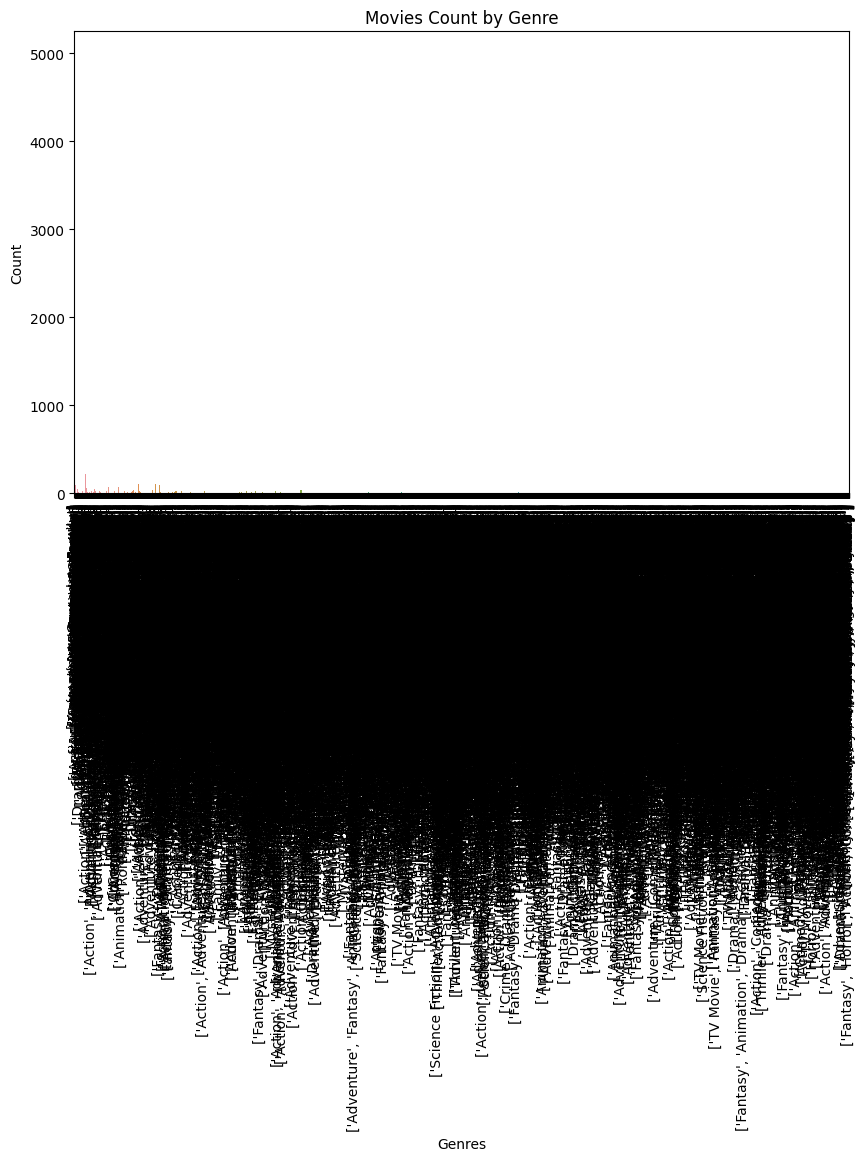

In [64]:
# Gráfico de barras de las películas por género
plt.figure(figsize=(10, 6))
sns.countplot(x='genres', data=df1)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Movies Count by Genre')
plt.xticks(rotation=90)
plt.show()

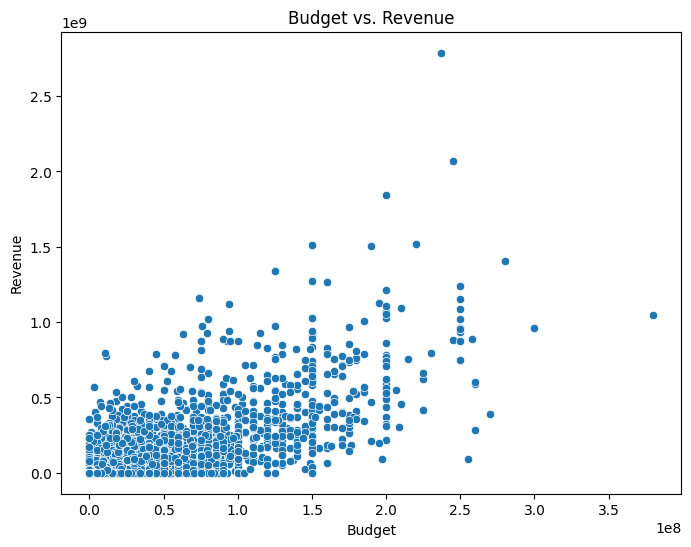

In [65]:
# Gráfico de dispersión entre el presupuesto y los ingresos
plt.figure(figsize=(8, 6))
sns.scatterplot(x='budget', y='revenue', data=df1)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs. Revenue')
plt.show()

## 4.  Desarrollo de la API
Utilizar el framework FastAPI para crear una API que exponga los datos de la empresa.


In [66]:
pip install fastapi

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install uvicorn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [73]:
from fastapi import FastAPI
app = FastAPI()

In [74]:
# uvicorn main:app --reload

In [75]:
# http://localhost:8000/peliculas_mes?mes=enero

In [69]:
# Función para obtener la cantidad de películas estrenadas en un mes
@app.get('/peliculas_mes')
def peliculas_mes(mes):
    # Lógica para obtener la cantidad de películas estrenadas en el mes (mes en formato str)
    cantidad = obtener_cantidad_peliculas_mes(mes)
    return {'mes': mes, 'cantidad': cantidad}

In [ ]:
# Función para obtener la cantidad de películas estrenadas en un día de la semana
@app.get('/peliculas_dia')
def peliculas_dia(dia):
    # Lógica para obtener la cantidad de películas estrenadas en el día de la semana (día en formato str)
    cantidad = obtener_cantidad_peliculas_dia(dia)
    return {'dia': dia, 'cantidad': cantidad}

In [ ]:
# Función para obtener información de una franquicia de películas
@app.get('/franquicia')
def franquicia(franquicia):
    # Lógica para obtener la cantidad de películas, ganancia total y ganancia promedio de una franquicia
    cantidad, ganancia_total, ganancia_promedio = obtener_info_franquicia(franquicia)
    return {'franquicia': franquicia, 'cantidad': cantidad, 'ganancia_total': ganancia_total, 'ganancia_promedio': ganancia_promedio}

In [ ]:
# Función para obtener la cantidad de películas producidas en un país
@app.get('/peliculas_pais')
def peliculas_pais(pais):
    # Lógica para obtener la cantidad de películas producidas en un país
    cantidad = obtener_cantidad_peliculas_pais(pais)
    return {'pais': pais, 'cantidad': cantidad}

In [ ]:
# Función para obtener información de una productora de películas
@app.get('/productoras')
def productoras(productora):
    # Lógica para obtener la ganancia total y la cantidad de películas de una productora
    ganancia_total, cantidad = obtener_info_productora(productora)
    return {'productora': productora, 'ganancia_total': ganancia_total, 'cantidad': cantidad}

In [ ]:
# Función para obtener información de retorno de una película
@app.get('/retorno')
def retorno(pelicula):
    # Lógica para obtener la inversión, ganancia, retorno y año de lanzamiento de una película
    inversion, ganancia, retorno, anio = obtener_info_retorno(pelicula)
    return {'pelicula': pelicula, 'inversion': inversion, 'ganancia': ganancia, 'retorno': retorno, 'anio': anio}

## 5. Deployment:
Evaluar opciones de despliegue, como Render, Railway u otros servicios que permitan que la API sea accesible desde la web.
    -   Configurar y desplegar la API para que pueda ser consumida por el equipo y los usuarios finales.

 Configurar y desplegar la API para que pueda ser consumida por el equipo y los usuarios finales.